In [36]:
%run ../AML_Common.ipynb

Found the config file in: /home/common/notebooks/config.json


In [40]:
args = {
    'env': pendulum,
    'num_episodes': 5,
    'evaluation_frequency': 10
}
process_arguments(args, user='ken')

params = {
    'bootstrap_size': choice(8, 16),
    'plan_horizon': quniform(30, 50, 5),
    'risk_preference': uniform(-1.5, 0),
    'batch_size': choice(32, 64, 128)
}

run_sweep = train(name='HyperTest', cluster=p100_1, args=args, hyper_params=params, total_runs=32)

In [41]:
RunDetails(run_sweep).show()

_HyperDriveWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO'…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [48]:
args = {
    'env': pendulum,
    'num_episodes': 10,
    'evaluation_frequency': 10,
    'bootstrap_size': 8,
    'plan_horizon': 40,
    'batch_size': 64,
    'risk_preference': -1.25
}
process_arguments(args, user='ken')

run_single = train(name=pendulum, cluster=k80, args=args)

In [49]:
RunDetails(run_single).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [80]:
print(get_log_dir(args))

/mnt/azureml/azureml/log/Pendulum-v0/ken/num_episodes=10,bootstrap_size=8,plan_horizon=40,batch_size=64,risk_preference=-1.25


In [76]:
output_file_path = get_log_dir(args) + '/output.txt'
results = pd.read_csv(output_file_path, sep='\t', header=None, index_col=0, squeeze=True)

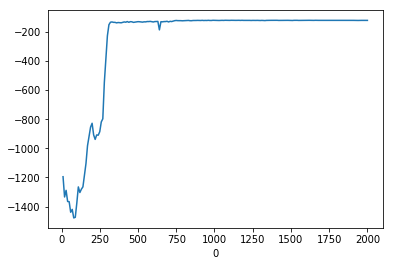

In [78]:
results.plot();